# Pendahuluan

Dari data perusahaan Y.Afisha periode Juni 2017 sampai Mei 2018, akan dilakukan analisa untuk menjawab beberapa pertanyaan :
 1. Bagaimana para pengguna menggunakan produk Y.Afisha
 2. Kapan mereka mulai melakukan pembelian
 3. Berapa jumlah uang yang disumbangkan oleh setiap pengguna
 4. Kapan semua biaya pemasaran terbayarkan

# Inisialisasi

In [1]:
# Memuat Library
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Menampilkan semua kolom
pd.set_option('display.max_columns', None)

# Memuat data

In [3]:
try:
    costs = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 7\File\costs_us.csv')
    orders = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 7\File\orders_log_us.csv')
    visits = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 7\File\visits_log_us.csv')
    
except:
    costs = pd.read_csv('/datasets/costs_us.csv')
    orders = pd.read_csv('/datasets/orders_log_us.csv')
    visits = pd.read_csv('/datasets/visits_log_us.csv')
    

# Optimalisasi data

In [4]:
# Fungsi informasi data
def info(file):
    print(file.info(memory_usage='deep'))
    print()
    print(file.head())

Membuat fungsi yang akan digunakan berulang untuk melihat informasi yang terdapat pada data.

## costs

In [5]:
# Informasi File
info(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB
None

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


Informasi pada kolomnya :

`source_id` — ID sumber iklan.
  
`dt` — tanggal.

`costs` — pengeluaran untuk sumber iklan pada tanggal tersebut.

Data memiliki ukuran sebesar 206.2 KB

Format yang tidak sesuai dalam data :

1. `dt` memiliki format object.

In [6]:
# Optimalisasi Data
try:
    costs = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 7\File\costs_us.csv',
                       parse_dates=['dt'])
        
except:
    costs = pd.read_csv('/datasets/costs_us.csv',
                       parse_dates=['dt'])
   

In [7]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Ukuran data berubah menjadi 59.7 KB.

Perubahan format data :

1. `dt` menjadi format datetime.

## orders

In [8]:
# Informasi File
info(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB
None

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


Informasi pada kolomnya :

`Uid` — ID pengguna yang membuat pesanan.

`Buy Ts` — tanggal dan waktu pesanan dibuat.

`Revenue` — pendapatan Y.Afisha dari pesanan tersebut.

Data memiliki ukuran sebesar 4.4 MB.

Format yang tidak sesuai dalam data :

1. `Buy Ts` memiliki format object.

In [9]:
# Optimalisasi Data
try:
    orders = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 7\File\orders_log_us.csv',
                       parse_dates=['Buy Ts'])
        
except:
    orders = pd.read_csv('/datasets/costs_us.csv',
                       parse_dates=['Buy Ts'])
   

In [10]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Ukuran data berubah menjadi 1.2 MB.

Perubahan format data :

1. `Buy Ts` menjadi format datetime.

## visits

In [11]:
# Informasi File
info(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB
None

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   996969

In [12]:
# Informasi kolom Device
visits.value_counts('Device')

Device
desktop    262567
touch       96833
Name: count, dtype: int64

Informasi pada kolomnya :

`Uid` — ID pengguna.

`Device` —perangkat pengguna.

`Start Ts` — tanggal dan waktu dimulainya sesi.

`End Ts` — tanggal dan waktu berakhirnya sesi.

`Source Id` — ID sumber iklan, sumber yang digunakan pengguna untuk datang ke situs web.

Data memiliki ukuran sebesar 79.3 MB.

Format yang tidak sesuai dalam data :

1. `Device` memiliki format object.
2. `End Ts` memiliki format object.
3. `Start Ts` memiliki format object.

In [13]:
# Optimalisasi Data
try:
    visits = pd.read_csv(r'C:\Users\vidop\Documents\Practicum\Sprint 7\File\visits_log_us.csv',
                         dtype={'Device':'category'},
                         parse_dates=['End Ts', 'Start Ts'])
                         
        
except:
    visits = pd.read_csv('/datasets/costs_us.csv',
                         dtype={'Device':'category'},
                         parse_dates=['End Ts', 'Start Ts'])
   

In [14]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Ukuran data berubah menjadi 11.3 MB.

Perubahan format data :

1. `Device` menjadi format category.
2. `End Ts` menjadi format datetime.
3. `Start Ts` menjadi format datetime.

# Memeriksa dan memperbaiki data

In [15]:
# Fungsi memeriksa data
def check(file):
    na = file.isna().sum().sum()
    dup = file.duplicated().sum()
    print('Data memiliki baris dan kolom :', file.shape)
    print()
    print(file.info())
    print()
    if na > 0 :
        print('Data memiliki nilai yang hilang pada kolom :')
        print(file.isna().sum())
    else :
        print('Data tidak memiliki nilai yang hilang')
    print()
    if dup > 0 :
        print('Data memiliki duplikat eksplisit sebesar', dup,'Baris')
    else :
        print('Data tidak memiliki duplikat ekspilisit')
    print()
    print(file.describe())
    

Membuat fungsi yang akan digunakan berulang untuk memeriksa data.

## costs

### Memeriksa data

In [16]:
check(costs)

Data memiliki baris dan kolom : (2542, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None

Data tidak memiliki nilai yang hilang

Data tidak memiliki duplikat ekspilisit

         source_id                             dt        costs
count  2542.000000                           2542  2542.000000
mean      4.857199  2017-11-29 09:04:57.403619072   129.477427
min       1.000000            2017-06-01 00:00:00     0.540000
25%       2.000000            2017-08-30 00:00:00    21.945000
50%       4.000000            2017-11-29 00:00:00    77.295000
75%       9.000000            2018-02-28 00:00:00   170.065000
max      10.000000 

Tidak terdapat masalah pada data costs.

## orders

### Memeriksa data

In [17]:
check(orders)

Data memiliki baris dan kolom : (50415, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None

Data tidak memiliki nilai yang hilang

Data tidak memiliki duplikat ekspilisit

                              Buy Ts       Revenue           Uid
count                          50415  50415.000000  5.041500e+04
mean   2017-12-20 05:14:24.846176768      4.999647  9.098161e+18
min              2017-06-01 00:10:00      0.000000  3.135781e+14
25%              2017-10-13 17:28:00      1.220000  4.533567e+18
50%              2017-12-21 14:12:00      2.500000  9.102274e+18
75%              2018-03-02 16:10:00      4.890000  1.368290e+19
max         

Masalah yang terdapat dalam data :

1. Terdapat `Revenue` dengan nilai 0.
2. Nama kolom tidak lowercase.
3. Penulisan kolom Buy Ts tidak snake_case.

### Memperbaiki data

#### Menghapus revenue dengan nilai 0

In [18]:
# Cek jumlah baris data nilai revenue 0
orders.query('Revenue == 0')['Uid'].count()

51

Terdapat 51 baris data dengan nilai revenue 0.

In [19]:
# Menghapus nilai revenue 0
orders = orders.query('Revenue != 0')

In [20]:
# Cek perubahan data
orders.describe()

,Buy Ts,Revenue,Uid
count,50364,50364.000000,5.036400e+04
mean,2017-12-20 05:26:47.766261504,5.004710,9.101256e+18
min,2017-06-01 00:10:00,0.010000,3.135781e+14
25%,2017-10-13 17:16:30,1.220000,4.538637e+18
50%,2017-12-21 14:55:30,2.500000,9.103967e+18
75%,2018-03-02 16:13:30,4.890000,1.368463e+19
max,2018-06-01 00:02:00,2633.280000,1.844617e+19
std,NaN,21.828823,5.285808e+18


Data sudah tidak memiliki revenue dengan nilai 0.

#### Merubah nama kolom menjadi lowercase

In [21]:
# Merubah nama kolom menjadi lowercase
orders.columns = orders.columns.str.lower()

In [22]:
# Cek perubahan nama kolom
orders.columns

Index(['buy ts', 'revenue', 'uid'], dtype='object')

Nama kolom sudah berubah menjadi lowercase.

#### Merubah nama kolom menjadi snake_case

In [23]:
# Merubah nama kolom
orders = orders.rename(columns={'buy ts':'buy_ts'})

In [24]:
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Kolom buy_ts sudah berubah menjadi format snake_case.

#### Ringkasan perbaikan

In [25]:
# Cek perubahan data
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50364 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50364 non-null  datetime64[ns]
 1   revenue  50364 non-null  float64       
 2   uid      50364 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.5 MB


Jumlah baris data berubah menjadi 50364.

Perbaikan yang dilakukan :

1. Menghapus data pada kolom `Revenue` yang memiliki nilai 0.
2. Merubah nama kolom menjadi lowercase.
3. Merubah nama kolom Buy Ts menjadi buy_ts.

## visits

### Memeriksa Data

In [26]:
check(visits)

Data memiliki baris dan kolom : (359400, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB
None

Data tidak memiliki nilai yang hilang

Data tidak memiliki duplikat ekspilisit

                              End Ts      Source Id  \
count                         359400  359400.000000   
mean   2017-12-18 06:28:15.036205056       3.750515   
min              2017-06-01 00:02:00       1.000000   
25%              2017-10-15 09:45:45       3.000000   
50%              2017-12-18 18:59:30       4.000000   
75%        

Masalah yang terdapat dalam data :

1. Nama kolom tidak lowercase.
2. Penulisan kolom End Ts, Source ID, Start Ts tidak snake_case.

### Memperbaiki data

#### Merubah nama kolom menjadi lowercase

In [27]:
# Merubah kolom menjadi lowercase
visits.columns=visits.columns.str.lower()

In [28]:
# Cek perubahan nama kolom
visits.columns

Index(['device', 'end ts', 'source id', 'start ts', 'uid'], dtype='object')

Nama kolom sudah berubah menjadi lowercase.

#### Merubah nama kolom menjadi snake_case

In [29]:
# Merubah nama kolom
visits = visits.rename(columns={'end ts':'end_ts', 'source id':'source_id', 'start ts':'start_ts'})

In [30]:
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Nama kolom end_ts, source_id, start_ts sudah menjadi format snake_case.

#### Ringkasan perbaikan

In [31]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Perbaikan yang dilakukan :

1. Merubah nama kolom menjadi lowercase.
2. Merubah nama kolom End Ts, Source Id, Start Ts menjadi end_ts, source_id, start_ts.

# Eksplorasi data

## Produk

### Pengguna produk

Dari data visits akan digunakan untuk melihat jumlah pengguna produk setiap hari, minggu dan bulan. Serta stickiness ratio dari pengguna produk.

In [32]:
# Menambah informasi pada data visits
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date
visits['duration_sec'] = (visits['end_ts']-visits['start_ts']).dt.seconds

In [33]:
# Cek data
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


Data visits sudah ditambahkan parameter untuk menghitung jumlah pengguna produk.

In [34]:
# Mengiris data berdasarkan tipe device
desktop_visit = visits.query('device == "desktop"')
touch_visit = visits.query('device == "touch"')

In [35]:
# Fungsi untuk menghitung dau, wau, mau
data = []

def avg_user(file):
    dau = file.groupby('session_date').agg({'uid':'nunique'}).mean()
    wau = file.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
    mau = file.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
    data.append([int(dau),int(wau),int(mau)])

In [36]:
# Menjalankan fungsi untuk tiap irisan data
avg_user(desktop_visit)
avg_user(touch_visit)
avg_user(visits)

C:\Users\vidop\AppData\Local\Temp\ipykernel_628\854203421.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.append([int(dau),int(wau),int(mau)])
C:\Users\vidop\AppData\Local\Temp\ipykernel_628\854203421.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.append([int(dau),int(wau),int(mau)])
C:\Users\vidop\AppData\Local\Temp\ipykernel_628\854203421.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  data.append([int(dau),int(wau),int(mau)])


In [37]:
# Membuat tabel rata-rata pengguna
avg_user_table = pd.DataFrame(data=data, index=['desktop','touch','all_device'], columns=['dau','wau','mau'])

avg_user_table

,dau,wau,mau
desktop,659,4129,16724
touch,252,1634,6825
all_device,907,5716,23228


Device desktop memiliki jumlah rata-rata pengguna aktif terbanyak baik harian, mingguan, maupun bulanan.

Jika menambahkan jumlah pengguna desktop dan touch totalnya tidak akan sama dengan jumlah pengguna all_device, hal ini disebabkan karena satu pengguna (uid) dapat menggunakan 2 device.

In [38]:
# Fungsi untuk menghitung sticky rate dau, wau
data1 = []

def stick_rate(file):
    dau = file.groupby('session_date').agg({'uid':'nunique'}).mean()
    wau = file.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
    mau = file.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
    stick_wau = round((dau/wau)*100,2)
    stick_mau = round((dau/mau)*100,2)
    data1.append([float(stick_wau),float(stick_mau)])

In [39]:
# Menjalankan fungsi untuk setiap irisan data
stick_rate(desktop_visit)
stick_rate(touch_visit)
stick_rate(visits)

C:\Users\vidop\AppData\Local\Temp\ipykernel_628\2439603534.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data1.append([float(stick_wau),float(stick_mau)])
C:\Users\vidop\AppData\Local\Temp\ipykernel_628\2439603534.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data1.append([float(stick_wau),float(stick_mau)])
C:\Users\vidop\AppData\Local\Temp\ipykernel_628\2439603534.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data1.append([float(stick_wau),float(stick_mau)])


In [40]:
# Membuat tabel sticky rate
sticky_rate_table = pd.DataFrame(data=data1, index=['desktop','touch','all_device'], 
                                 columns=['sticky_dau %', 'sticky_mau %'])

sticky_rate_table

,sticky_dau %,sticky_mau %
desktop,15.96,3.94
touch,15.47,3.70
all_device,15.88,3.91


Sebesar 15.88% pengguna menggunakan kembali produk per minggu dan 3.91% per bulan di kedua device. Tidak terdapat perbedaan yang tinggi dari sticky rate pada kedua device.

#### Kesimpulan

Rata-rata jumlah pengguna aktif di kedua device ; harian : 907, mingguan : 5.716 dan bulanan : 23228. Dimana pengguna device desktop memiliki pengguna aktif tertinggi sebanyak ; harian : 659, mingguan : 4.129, dan bulanan : 16.724.


Sebesar 15.88% pengguna menggunakan kembali produk per minggu dan 3.91% per bulan di kedua device. Tidak terdapat perbedaan yang tinggi dari sticky rate pada kedua device.

### Sesi pengguna

Dari data visits akan digunakan untuk melihat jumlah sesi dan durasi harian pengguna.

array([<Axes: title={'center': 'desktop'}>,
       <Axes: title={'center': 'touch'}>], dtype=object)

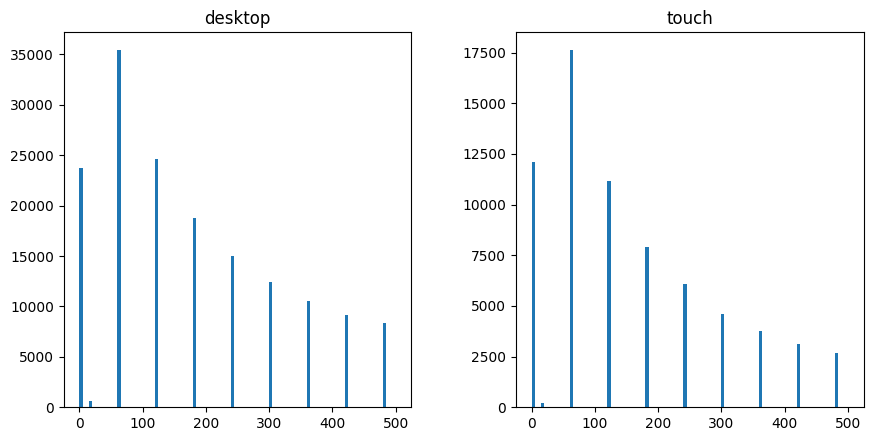

In [41]:
# Grafik histogram durasi
visits.hist(by='device', column='duration_sec',bins=100, figsize=(10,5), rot=0, range=(0,500))

Waktu penggunaan terbanyak produk di kedua device berada di range yang sama, 0 - 100 detik. 

In [42]:
# Rata-rata durasi sesi pengguna
desktop_asl = desktop_visit['duration_sec'].mode()
touch_asl = touch_visit['duration_sec'].mode()
all_asl = visits['duration_sec'].mode()

print('Rata-rata durasi pengguna desktop    :', float(desktop_asl), 'detik')
print('Rata-rata durasi pengguna touch      :', float(touch_asl), 'detik')
print('Rata-rata durasi pengguna all device :', float(all_asl), 'detik')

Rata-rata durasi pengguna desktop    : 60.0 detik
Rata-rata durasi pengguna touch      : 60.0 detik
Rata-rata durasi pengguna all device : 60.0 detik


C:\Users\vidop\AppData\Local\Temp\ipykernel_628\2165674071.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Rata-rata durasi pengguna desktop    :', float(desktop_asl), 'detik')
C:\Users\vidop\AppData\Local\Temp\ipykernel_628\2165674071.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Rata-rata durasi pengguna touch      :', float(touch_asl), 'detik')
C:\Users\vidop\AppData\Local\Temp\ipykernel_628\2165674071.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('Rata-rata durasi pengguna all device :', float(all_asl), 'detik')


Tidak terdapat perbedaan rata-rata durasi penggunaan di kedua device, rata-rata durasi penggunaan user adalah 60 detik.

In [43]:
# Jumlah sesi pengguna desktop per hari
desktop_session = desktop_visit.groupby('session_date').agg({'uid':['count', 'nunique']})
desktop_session.columns = ['n_session', 'n_user']
desktop_session['sess_per_user'] = desktop_session['n_session'] / desktop_session['n_user']

desktop_session.head()

,n_session,n_user,sess_per_user
session_date,,,
2017-06-01,501,455,1.101099
2017-06-02,498,458,1.087336
2017-06-03,329,307,1.071661
2017-06-04,349,326,1.070552
2017-06-05,693,631,1.098257


<Axes: title={'center': 'Desktop session per user'}, xlabel='session_date'>

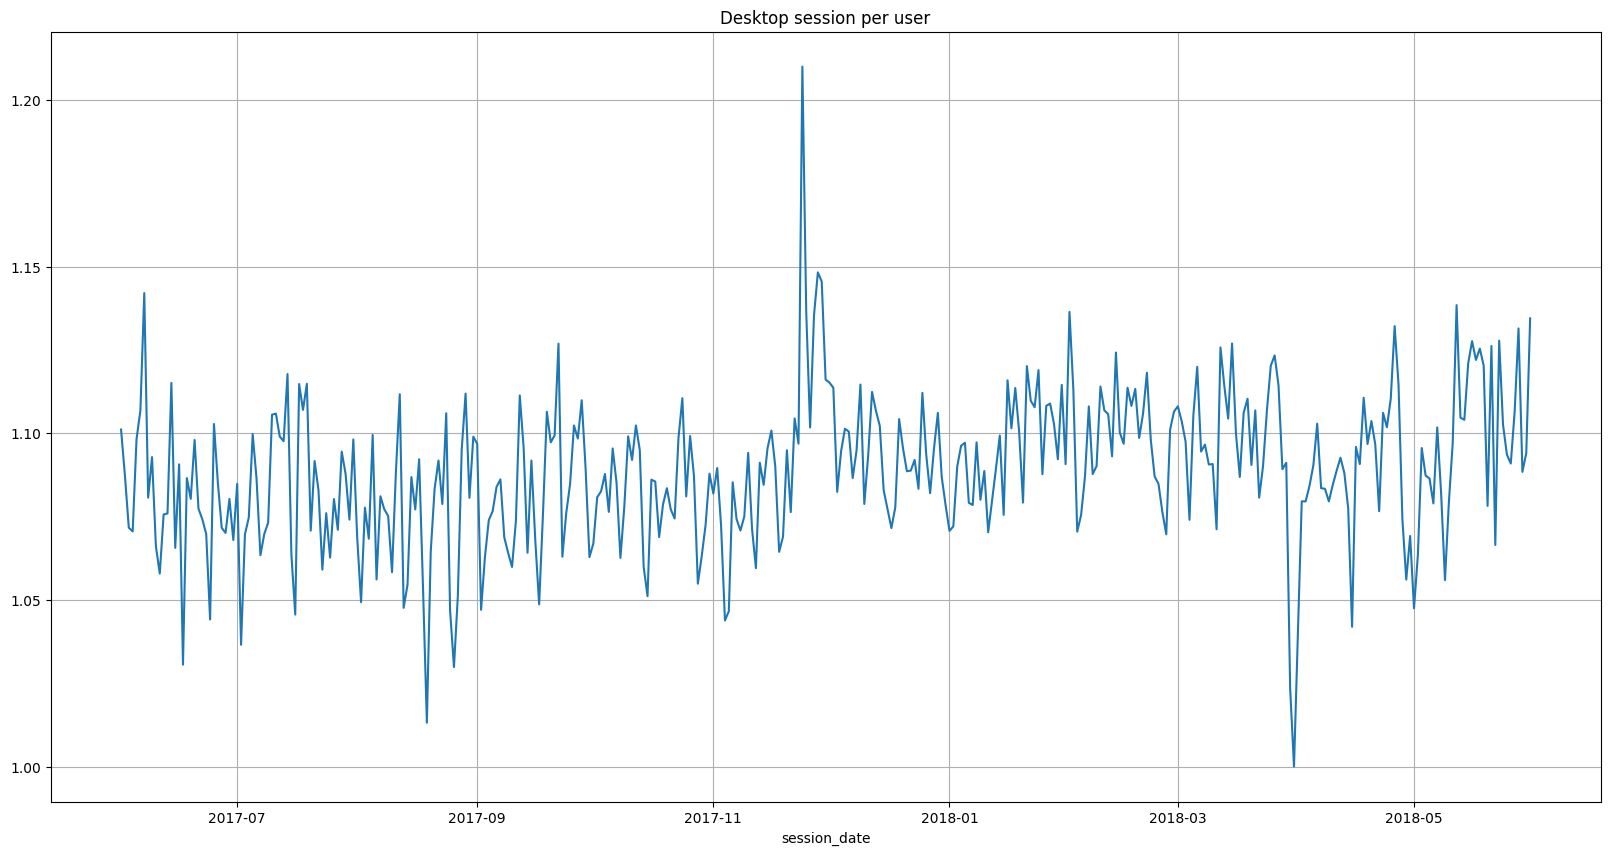

In [44]:
# Grafik garis
desktop_session['sess_per_user'].plot(figsize=(20,10), grid=True, title='Desktop session per user')

Sesi pengguna desktop tertinggi pada periode Desember 2017 dan terendah pada April 2018.

In [45]:
# Jumlah sesi pengguna touch per hari
touch_session = touch_visit.groupby('session_date').agg({'uid':['count', 'nunique']})
touch_session.columns = ['n_session', 'n_user']
touch_session['sess_per_user'] = touch_session['n_session'] / touch_session['n_user']

touch_session.head()

,n_session,n_user,sess_per_user
session_date,,,
2017-06-01,163,153,1.065359
2017-06-02,160,152,1.052632
2017-06-03,148,139,1.064748
2017-06-04,161,153,1.052288
2017-06-05,200,195,1.025641


,n_session,n_user,sess_per_user
session_date,,,
2017-06-01,163,153,1.065359
2017-06-02,160,152,1.052632
2017-06-03,148,139,1.064748
2017-06-04,161,153,1.052288
2017-06-05,200,195,1.025641


<Axes: title={'center': 'Touch session per user'}, xlabel='session_date'>

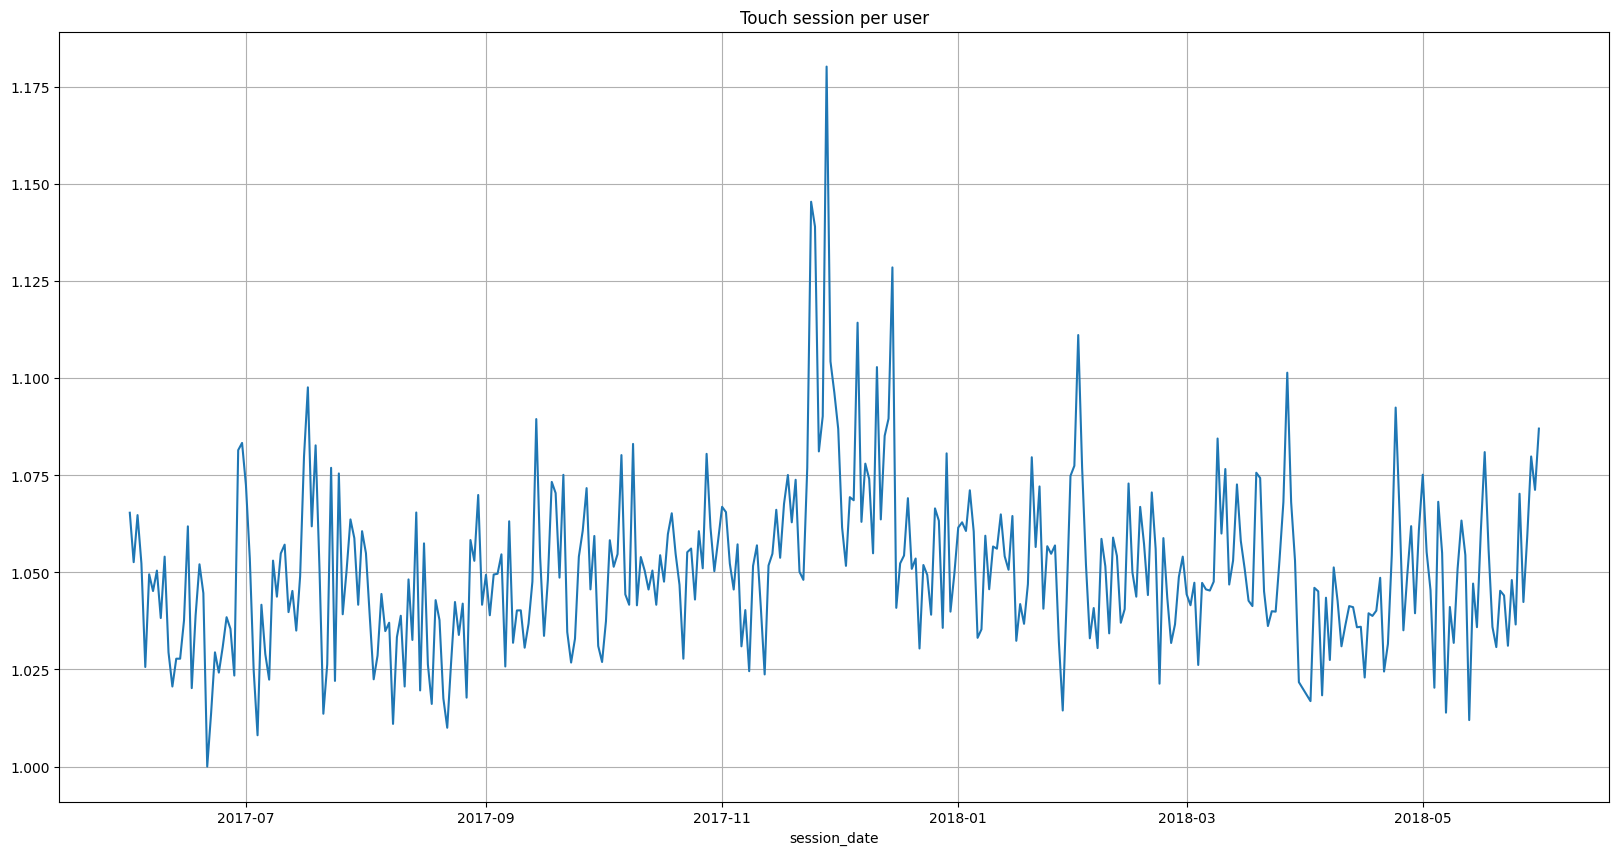

In [46]:
# Grafik garis
touch_session['sess_per_user'].plot(figsize=(20,10), grid=True, title='Touch session per user')

Sesi pengguna desktop tertinggi pada periode Desember 2017 dan terendah pada Juni 2017.

In [47]:
# Jumlah sesi pengguna all device per hari
all_device_session = visits.groupby('session_date').agg({'uid':['count', 'nunique']})
all_device_session.columns = ['n_session', 'n_user']
all_device_session['sess_per_user'] = all_device_session['n_session'] / all_device_session['n_user']

all_device_session.head()

,n_session,n_user,sess_per_user
session_date,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


<Axes: title={'center': 'All device session per user'}, xlabel='session_date'>

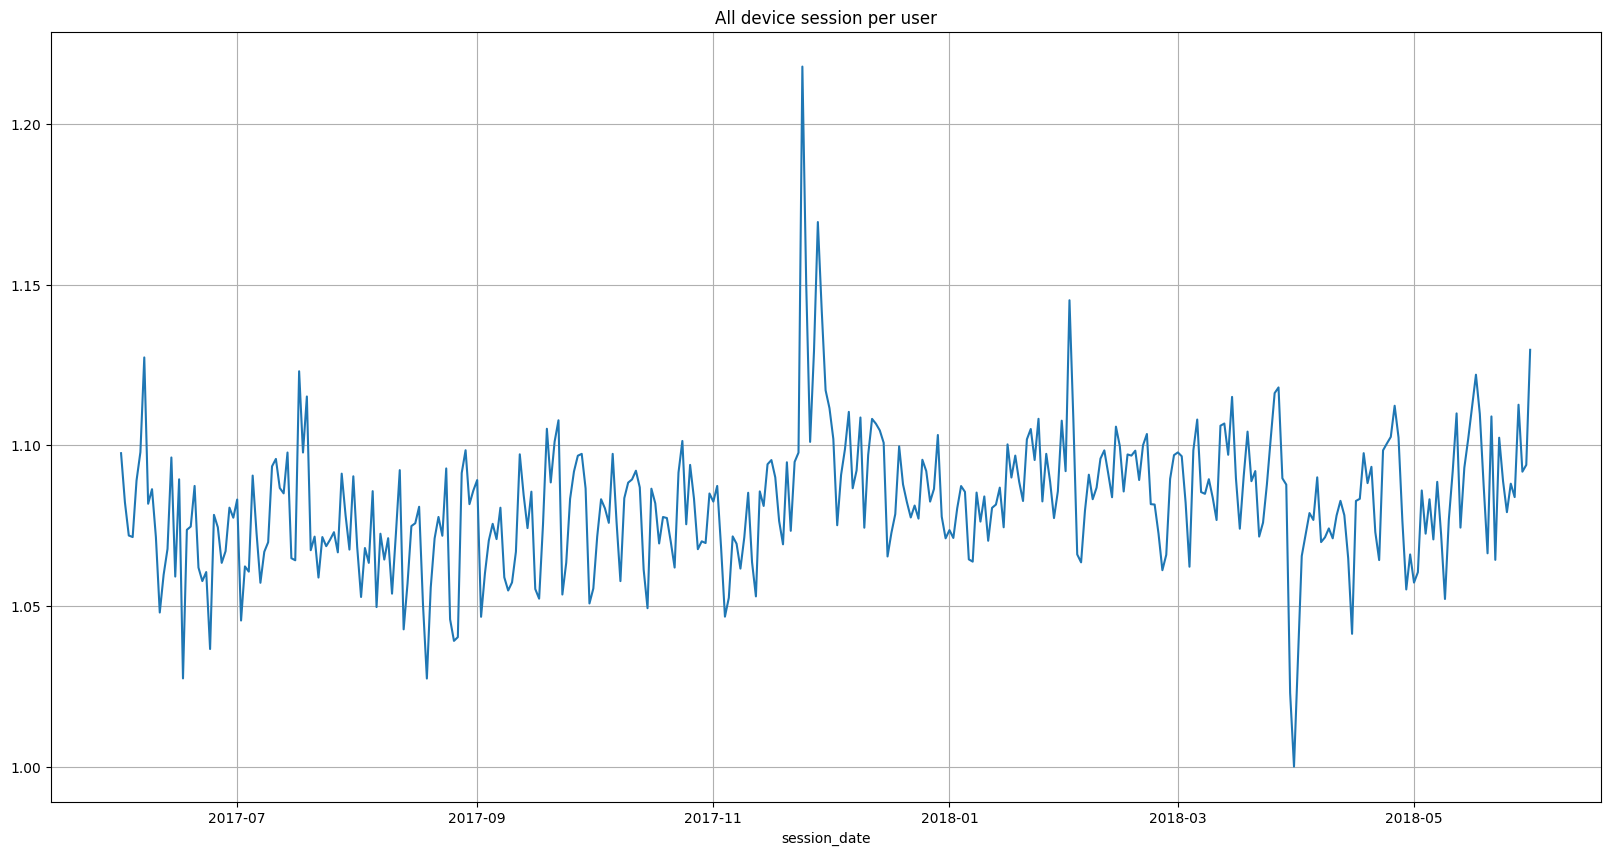

In [48]:
# Grafik garis
all_device_session['sess_per_user'].plot(figsize=(20,10), grid=True, title='All device session per user')

Sesi semua pengguna tertinggi pada periode Desember 2017 dan terendah pada April 2018, hal ini disebabkan karena jumlah pengguna desktop yang lebih tinggi dari pengguna touch.

In [49]:
# Fungsi menghitung rata-rata sesi user
session = []

def avg_session(file) :
    avg_session = file['n_session'].mean()
    avg_user = file['n_user'].mean()
    avg_sess_user = avg_session / avg_user
    session.append([round(avg_session,2), round(avg_user,2), round(avg_sess_user,2)])

In [50]:
# menerapkan fungsi pada irisan data device
avg_session(desktop_session)
avg_session(touch_session)
avg_session(all_device_session)

In [51]:
# Membuat tabel sesi user
user_session = pd.DataFrame(data=session, index=['desktop','touch','all_device'], 
                            columns=['n_session','n_user','sess_per_user'])

user_session

,n_session,n_user,sess_per_user
desktop,721.34,659.24,1.09
touch,266.76,252.87,1.05
all_device,987.36,907.99,1.09


Rata-rata sesi per pengguna pada kedua device adalah 1,09.

Rata-rata sesi harian dan pengguna harian desktop lebih tinggi daripada touch.



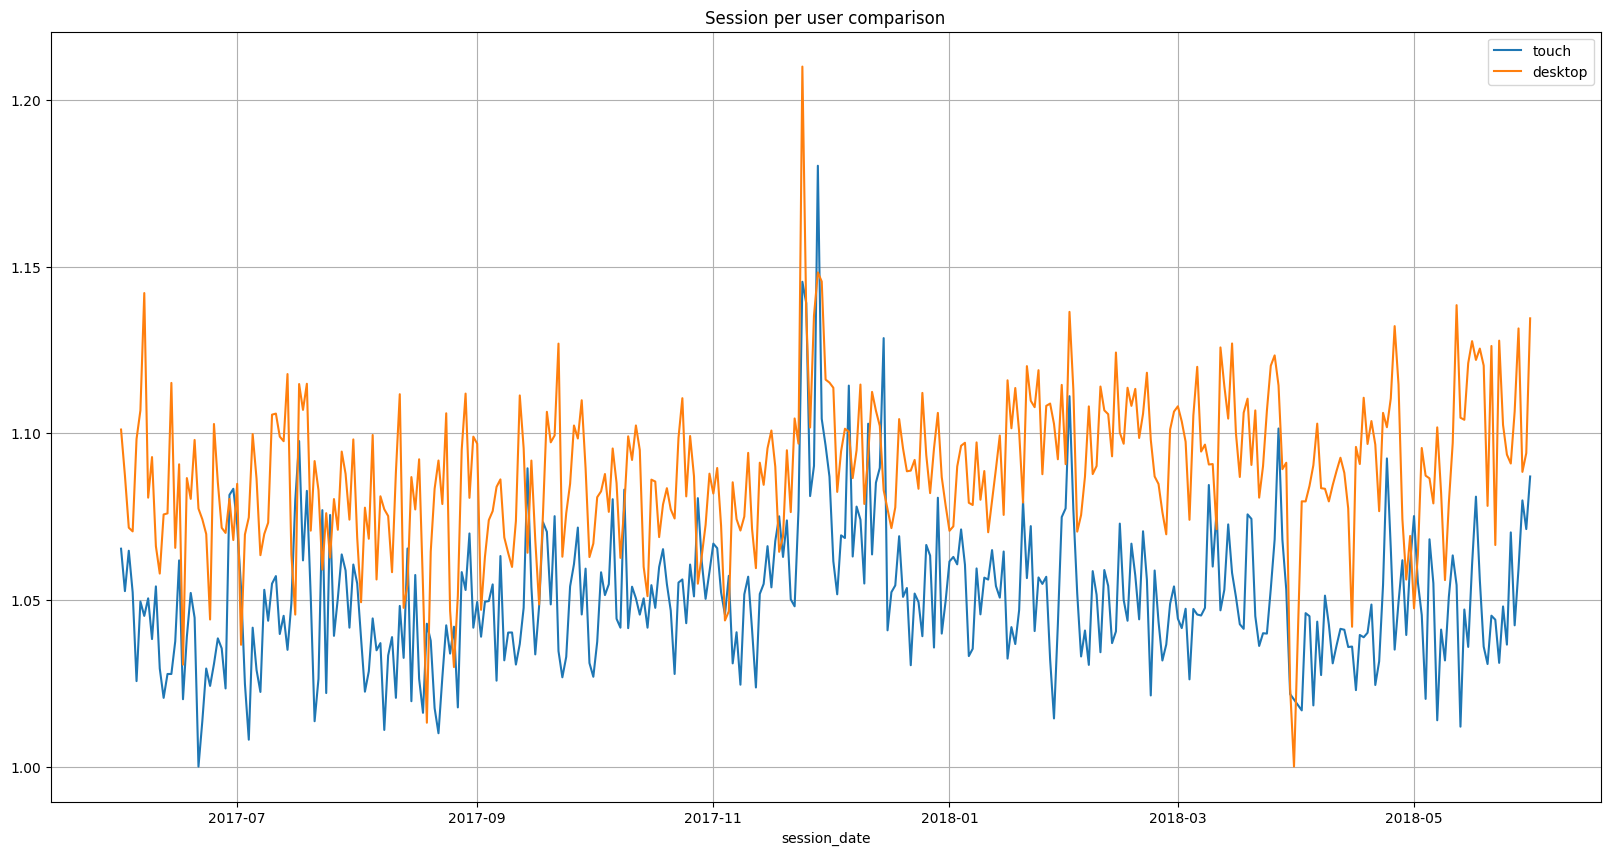

In [52]:
# Grafik garis perbandingan kedua device
touch_session['sess_per_user'].plot(figsize=(20,10), grid=True)
desktop_session['sess_per_user'].plot(figsize=(20,10), grid=True)
plt.title('Session per user comparison')
plt.legend(['touch', 'desktop'])

Jika dilihat dari grafik perbandingan session per user harian pengguna lebih banyak menggunakan desktop.

#### Kesimpulan

Tidak terdapat perbedaan rata-rata durasi penggunaan di kedua device, rata-rata durasi penggunaan adalah 60 detik.

Rata-rata sesi per user harian pada kedua device adalah 1,09.

Rata-rata sesi harian dan pengguna harian desktop lebih tinggi daripada touch.


## Penjualan

### Kapan pengguna mulai melakukan pembelian

Untuk mencari waktu kapan pengguna mulai melakukan pembelian akan dilihat dengan membandingkan tanggal pertama kunjungan dengan tanggal pertama pembelian.

In [53]:
# Mencari tanggal pertama pembelian dan kunjungan
first_visit = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_order = orders.groupby('uid').agg({'buy_ts':'min'}).reset_index()

# Mengganti nama kolom
first_visit.columns=['uid', 'first_visit_date']
first_order.columns=['uid', 'first_order_date']

In [54]:
# Menggabungkan first_visit dengan first_order
purchase_user = first_order.merge(first_visit, on='uid')

In [55]:
# Selisih waktu pelanggan melakukan pembelian dalam hari
purchase_user['days'] = (purchase_user['first_order_date'] - purchase_user['first_visit_date']).dt.days

array([[<Axes: title={'center': 'days'}>]], dtype=object)

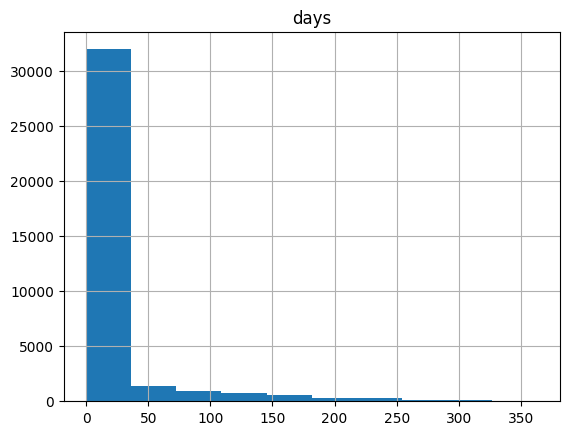

In [56]:
# Grafik histogram
purchase_user.hist('days')

Sebagian besar pengguna melakukan pembelian di kunjungan pertama.

Pengguna yang melakukan pembelian di kunjungan pertama akan dikelompokan dalam kategori H0 dan yang tidak akan dikelompokan dalam kategori H1.

In [57]:
# Mengelompokan kategori pengguna
purchase_user['category'] = 'H1'
purchase_user.loc[purchase_user['days'] <=0, 'category'] = 'H0'

In [58]:
# Mengelompokan bulan pembelian
purchase_user['first_order_month'] = purchase_user['first_order_date'].dt.strftime('%Y-%m')

In [59]:
# Pivot table
purchase_user_pvt = purchase_user.pivot_table(index='first_order_month', columns='category', 
                                     values='days', aggfunc='count', margins=True)

purchase_user_pvt

category,H0,H1,All
first_order_month,,,
2017-06,1799.0,223.0,2022
2017-07,1529.0,393.0,1922
2017-08,1095.0,274.0,1369
2017-09,1967.0,612.0,2579
2017-10,3299.0,1041.0,4340
2017-11,2863.0,1215.0,4078
2017-12,2992.0,1388.0,4380
2018-01,2318.0,1055.0,3373
2018-02,2486.0,1165.0,3651


<Axes: xlabel='first_order_month'>

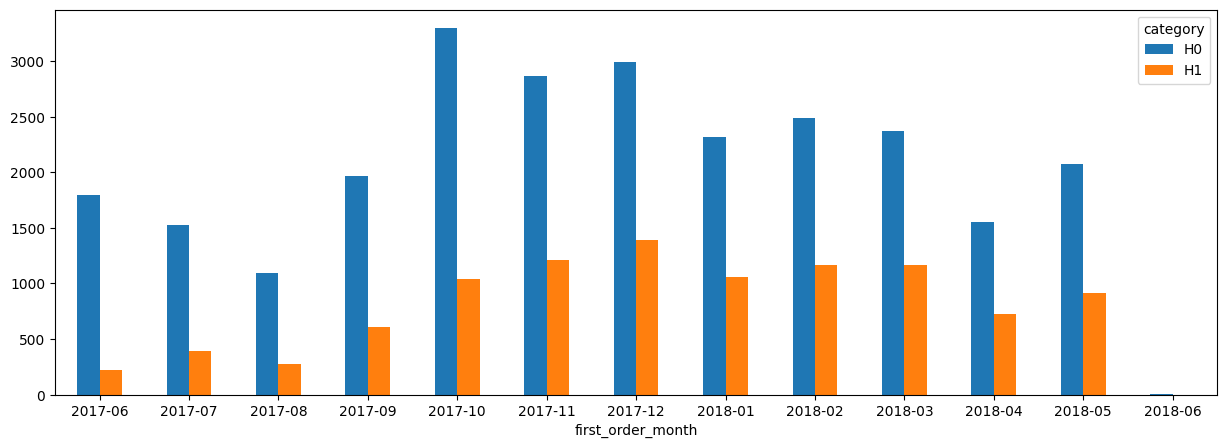

In [60]:
# Grafik batang
purchase_user.pivot_table(index='first_order_month', columns='category',
                         values='days', aggfunc='count').plot(kind='bar', rot=0, figsize=(15,5))

Pada bulan Oktober 2017, memiliki jumlah pengguna yang melakukan pembelian pada kunjungan pertama (H0) tertinggi sebanyak 3299.

Pada bulan Desember 2017, memiliki jumlah pengguna yang tidak melakukan pembelian pada kunjungan pertama (H1) tertinggi sebanyak 1388 dan total pengguna tertinggi yang melakukan pembelian sebanyak 4380.

In [61]:
# Persentase pengguna yang melakukan pembelian
H0_user = purchase_user_pvt.loc['All','H0'] / purchase_user_pvt.loc['All','All'] *100
H1_user = purchase_user_pvt.loc['All','H1'] / purchase_user_pvt.loc['All','All'] *100

print('Persentase total pengguna yang melakukan pembelian di kunjungan pertama', round(H0_user,2),'%')
print('Persentase total pengguna yang tidak melakukan pembelian di kunjungan pertama', round(H1_user,2),'%')

Persentase total pengguna yang melakukan pembelian di kunjungan pertama 72.17 %
Persentase total pengguna yang tidak melakukan pembelian di kunjungan pertama 27.83 %


Pengguna yang melakukan pembelian pada kunjungan pertama (H0) sebanyak 26349 atau 72.17% dari total pengguna yang melakukan pembelian.


#### Kesimpulan

Dari total pengguna dalam data sebesar 72.17% atau 26.349 pengguna melakukan pembelian pada kunjungan pertamanya.

Pada bulan Oktober 2017 merupakan periode dimana jumlah pengguna tertinggi yang melakukan pembelian pada kunjungan pertamanya sebesar 3.299 pengguna.

Sedangakan pada bulan Desember 2017 merupakan periode dimana jumlah pengguna tertinggi yang tidak melakukan pembelian pada kunjungan pertamanya sebesar 1.388 pengguna, namun memiliki total jumlah pengguna tertinggi yang melakukan pembelian sebesar 4.380 pengguna.

### Jumlah penjualan

Untuk melihat jumlah penjualan dari masing-masing kohort yang dikelompokkan dari bulan pertama pembelian.

In [62]:
# Menggabungkan data tanggal pertama pembelian
orders = orders.merge(first_order, on='uid', how='left')

In [63]:
# Menambah kolom bulan pertama pembelian
orders['first_order_month'] = orders['first_order_date'].dt.strftime('%Y-%m')

In [64]:
# Membuat laporan pendapatan
sales = orders.groupby('first_order_month').agg({'uid':'nunique','buy_ts':'count','revenue':'sum'})
sales.columns=['n_user','n_order','revenue']

# Menghitung rata-rata pendapatan per user
sales['revenue_per_user'] = sales['revenue'] / sales['n_user']

sales

,n_user,n_order,revenue,revenue_per_user
first_order_month,,,,
2017-06,2022,4430,24030.25,11.884397
2017-07,1922,2909,16127.92,8.391217
2017-08,1369,2187,11606.26,8.477911
2017-09,2579,3873,34672.72,13.444250
2017-10,4340,6005,27603.45,6.360242
2017-11,4078,5878,26098.77,6.399895
2017-12,4380,5890,33490.11,7.646144
2018-01,3373,4308,16663.13,4.940151
2018-02,3651,4469,16750.50,4.587921


<Axes: title={'center': 'Jumlah order penjualan'}, xlabel='first_order_month'>

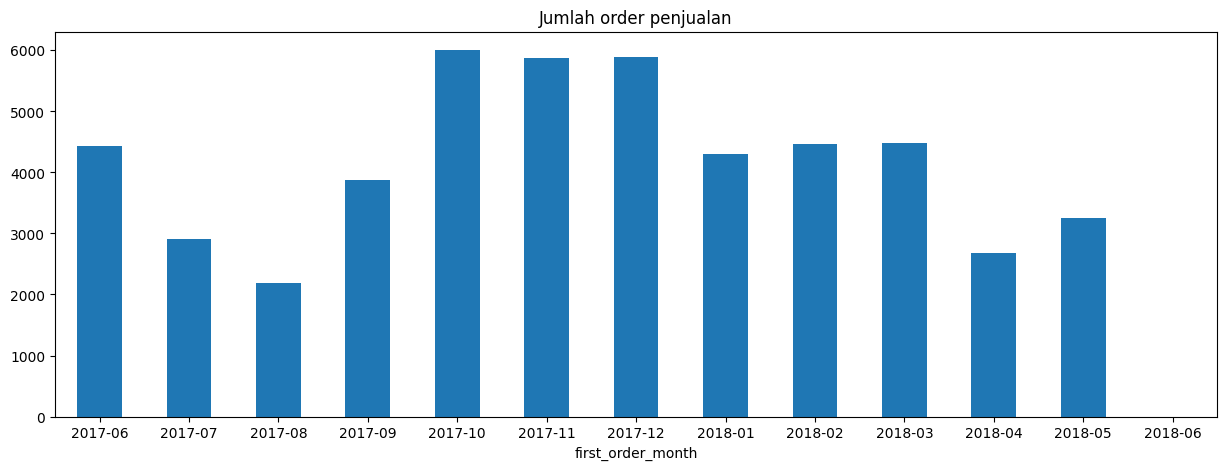

In [65]:
# Grafik batang jumlah order
sales['n_order'].plot(kind='bar', figsize=(15,5), rot=0, title='Jumlah order penjualan')

Jumlah pesanan tertinggi pada kohort *2017-10* sebanyak 6.005 order.

<Axes: title={'center': 'Total pendapatan'}, xlabel='first_order_month'>

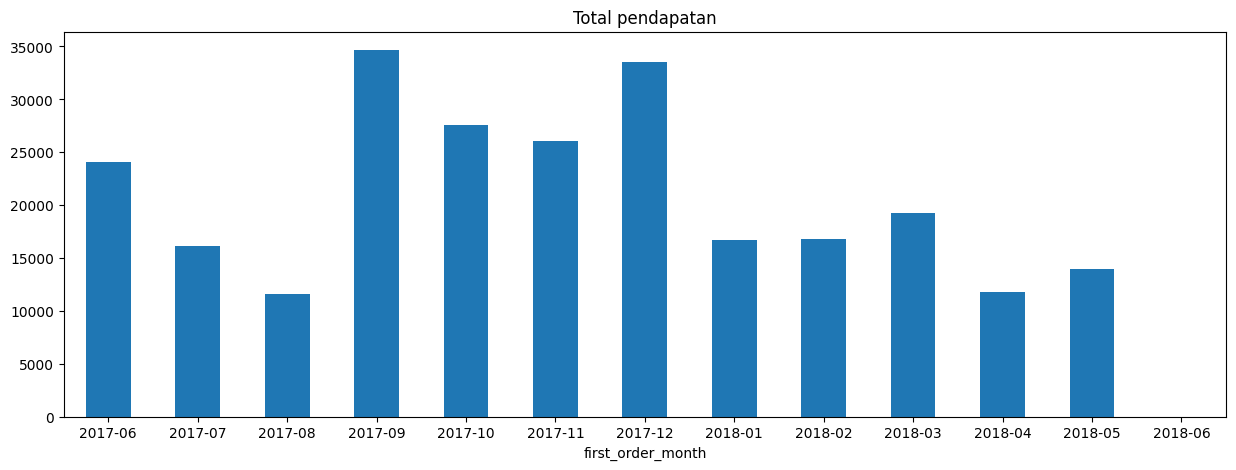

In [66]:
# Grafik batang jumlah pendapatan
sales['revenue'].plot(kind='bar', figsize=(15,5), rot=0, title='Total pendapatan')

Jumlah pendapatan tertinggi pada kohort *2017-09-01* sebesar 34.672.

<Axes: title={'center': 'Rata-rata pendapatan per user'}, xlabel='first_order_month'>

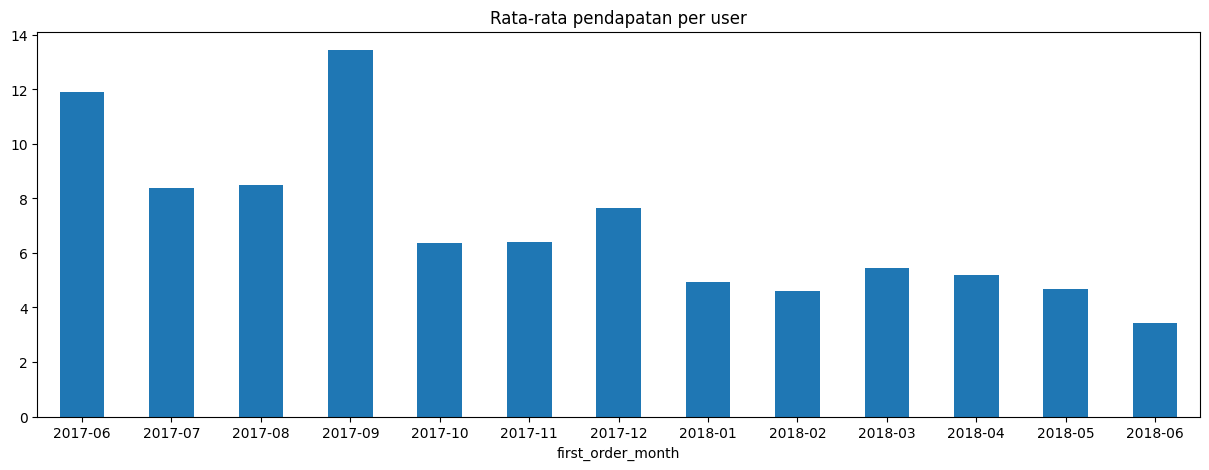

In [67]:
# Grafik batang rata-rata pendapatan per user
sales['revenue_per_user'].plot(kind='bar', figsize=(15,5), rot=0, title='Rata-rata pendapatan per user')

Rata-rata pendapatan per pengguna tertinggi ada pada kohort *2017-09* sebesar 13.44 per pengguna.

#### Kesimpulan


Kohort *2017-09-01* menghasilkan pendapatan tertinggi sebesar 34.672 dan rata-rata pendapatan per pengguna tertinggi sebesar 13.44.

Jumlah pesanan tertinggi ada pada kohort *2017-10-01* sebesar 6.005 order.

### LTV (Lifetime Value)

Untuk mengukur pendapatan yang dihasilkan oleh masing-masing kohort pengguna.

In [68]:
# Menambah kolom bulan pembelian
orders['order_month'] = orders['buy_ts'].dt.strftime('%Y-%m')

In [69]:
# Mengelompokkan revenue per bulan pertama pembelian dan bulan pembelian
report = orders.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum'}).reset_index()

# Menambahkan jumlah pengguna kohort
report = report.merge(sales['n_user'], on='first_order_month')

In [70]:
# Menambahkan usia kohort pembelian
report['age'] = (pd.to_datetime(report['order_month']) - pd.to_datetime(report['first_order_month'])) / np.timedelta64(1,'M')
report['age'] = report['age'].round().astype('int')

# Menghitung ltv
report['ltv'] = report['revenue'] / report['n_user']

In [71]:
# Membuat report ltv
ltv_report = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')

<Axes: title={'center': 'Lifetime Value'}, xlabel='age', ylabel='first_order_month'>

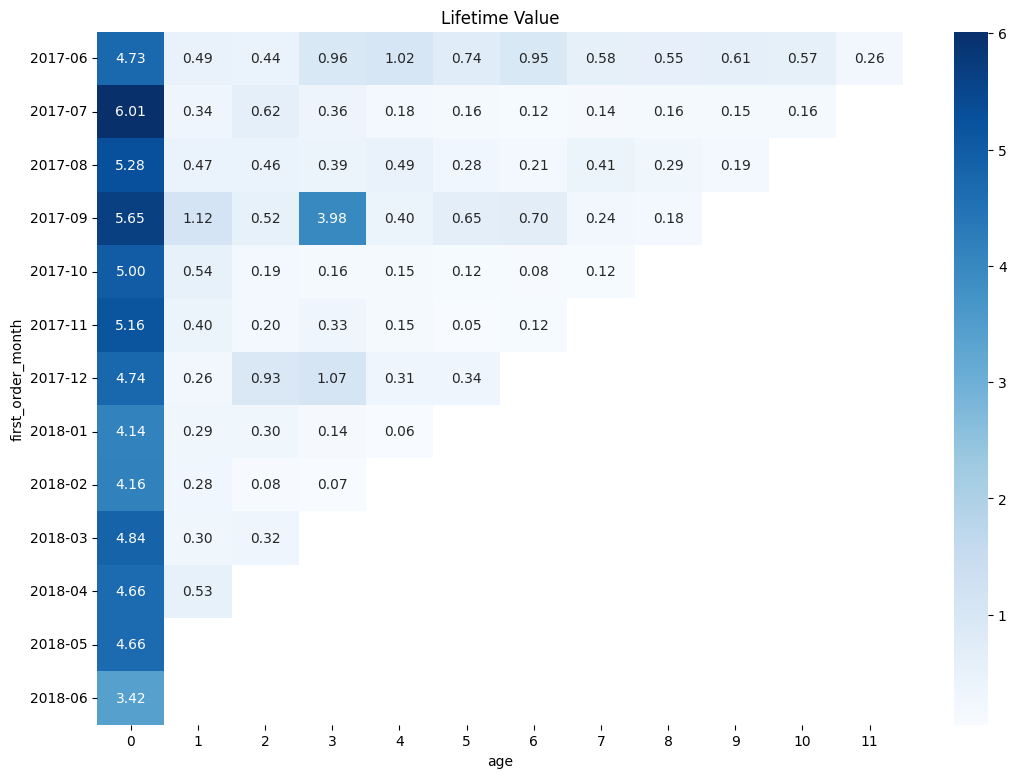

In [72]:
# Grafik heatmap report ltv
plt.figure(figsize=(13,9))
plt.title('Lifetime Value')
sns.heatmap(ltv_report, annot=True, fmt='.2f', cmap='Blues')

Report ltv divisualisasikan dengan grafik heatmap agar lebih mudah dibaca.

Semua kohort melakukan pembelian yang besar pada awal bulan pembelian.

#### Kesimpulan

Kohort *2017-06* memiliki rata-rata pembelian kembali bulanan yang paling stabil.

Kohort *2017-09* memiliki rata-rata pembelian kembali tertinggi pada bulan ke 3 sebesar 3,98.

## Pemasaran

### Jumlah biaya

Untuk melihat total biaya dan biaya per sumber.

In [73]:
# Menambah kolom bulan biaya
costs['cost_month'] = costs['dt'].dt.strftime('%Y-%m')

In [74]:
# Total biaya
costs.pivot_table(index='cost_month', columns='source_id', values='costs', aggfunc='sum', margins=True)

source_id,1,2,3,4,5,9,10,All
cost_month,,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22,18015.00
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82,18240.59
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57,14790.54
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67,24368.91
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24,36322.88
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36,37907.88
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86,38315.35
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35,33518.52
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88,32723.03


<Axes: title={'center': 'Total biaya per sumber'}, xlabel='source_id'>

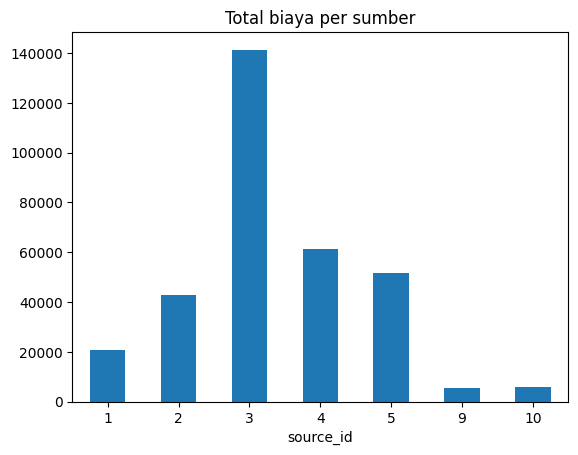

In [75]:
# Grafik batang total biaya per sumber
costs.groupby('source_id')['costs'].sum().plot(kind='bar', rot=0, title='Total biaya per sumber')

source_id nomor 3 memiliki total biaya tertinggi sebesar 141.321.

<Axes: title={'center': 'Total biaya per bulan'}, xlabel='cost_month'>

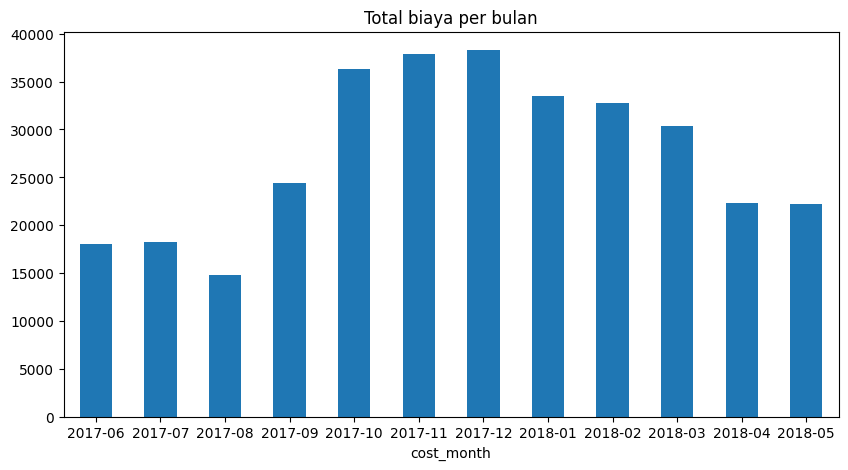

In [76]:
# Grafik batang total biaya per bulan
costs.groupby('cost_month')['costs'].sum().plot(kind='bar', rot=0, figsize=(10,5), title='Total biaya per bulan')

Periode *2017-12* memiliki total biaya bulanan tertinggi sebesar 38.315.



#### Kesimpulan

Total biaya yang dikeluarkan sebesar 329.131 dimana porsi terbesar biaya dimiliki oleh sumber nomor 3 sebesar 141.321.

Periode *2017-12* merupakan periode yang memiliki biaya bulanan tertinggi sebesar 38.315.

### CAC (Customer Acquisition Cost)

Untuk melihat biaya akuisisi pelanggan per sumber biaya.

In [77]:
# Biaya per sumber
costs_per_source = costs.pivot_table(index='cost_month', columns='source_id', values='costs', aggfunc='sum')
costs_per_source['total'] = costs_per_source.sum(axis=1)


In [78]:
# Menambah jumlah user
costs_per_source = costs_per_source.join(sales['n_user'], lsuffix='cost_month', rsuffix='first_order_month', how='left')

In [79]:
# Loop kolom dan perhitungan cac
lists = [1,2,3,4,5,9,10,'total']

for i in lists:
    cac = costs_per_source[i] / costs_per_source['n_user']
    costs_per_source['cac_' + str(i)] = cac

In [80]:
# Cek data
costs_per_source

,1,2,3,4,5,9,10,total,n_user,cac_1,cac_2,cac_3,cac_4,cac_5,cac_9,cac_10,cac_total
cost_month,,,,,,,,,,,,,,,,,
2017-06,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22,18015.00,2022,0.556682,1.200485,3.823764,1.738279,1.293828,0.141058,0.155401,8.909496
2017-07,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82,18240.59,1922,0.558210,1.213897,3.992908,1.836488,1.559906,0.157409,0.171602,9.490421
2017-08,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57,14790.54,1369,0.695259,1.322900,4.487611,2.350153,1.596260,0.181833,0.169883,10.803901
2017-09,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67,24368.91,2579,0.582400,1.157681,3.863339,2.013284,1.492493,0.161155,0.178623,9.448976
2017-10,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24,36322.88,4340,0.533583,1.116359,3.626092,1.479456,1.328894,0.140417,0.144525,8.369327
2017-11,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36,37907.88,4078,0.599598,1.286827,4.174924,1.321437,1.551089,0.167528,0.194301,9.295704
2017-12,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86,38315.35,4380,0.534521,1.118219,3.703087,1.753532,1.340758,0.150224,0.147457,8.747797
2018-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35,33518.52,3373,0.648141,1.232653,4.390388,1.729259,1.592505,0.162218,0.182138,9.937302
2018-02,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88,32723.03,3651,0.603802,1.225511,3.897168,1.564492,1.389019,0.151055,0.131712,8.962758


In [81]:
# Fungsi grafik batang
def bar(column):
    costs_per_source[column].plot(kind='bar', figsize=(15,5), rot=0)
    print(costs_per_source[column])

cost_month
2017-06    0.556682
2017-07    0.558210
2017-08    0.695259
2017-09    0.582400
2017-10    0.533583
2017-11    0.599598
2017-12    0.534521
2018-01    0.648141
2018-02    0.603802
2018-03    0.535679
2018-04    0.583769
2018-05    0.491497
Name: cac_1, dtype: float64


Text(0.5, 1.0, 'CAC source_id : 1')

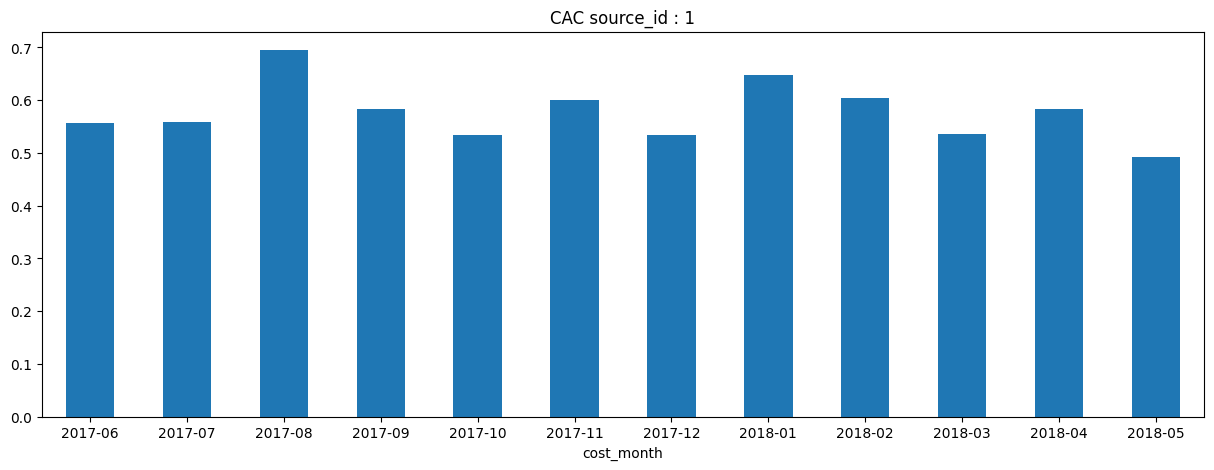

In [82]:
# Melihat CAC source_id 1
bar('cac_1')
plt.title('CAC source_id : 1')

CAC source_id : 1 tertinggi pada periode *2017-08* sebesar 0,695 per user.

cost_month
2017-06    1.200485
2017-07    1.213897
2017-08    1.322900
2017-09    1.157681
2017-10    1.116359
2017-11    1.286827
2017-12    1.118219
2018-01    1.232653
2018-02    1.225511
2018-03    1.115772
2018-04    1.316491
2018-05    0.900683
Name: cac_2, dtype: float64


Text(0.5, 1.0, 'CAC source_id : 2')

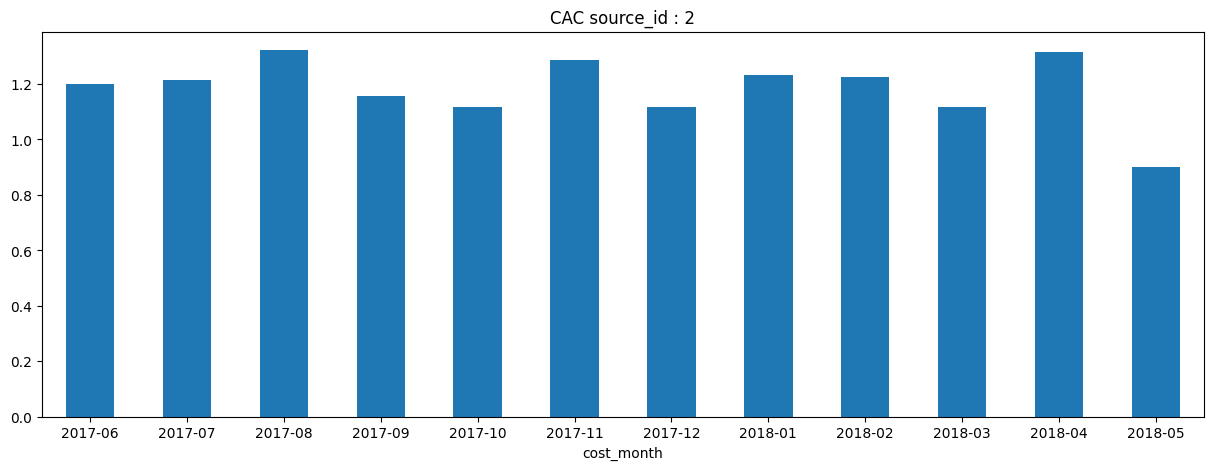

In [83]:
# Melihat CAC source_id 2
bar('cac_2')
plt.title('CAC source_id : 2')

CAC source_id : 2 tertinggi pada periode *2017-08* sebesar 1,323 per user.

cost_month
2017-06    3.823764
2017-07    3.992908
2017-08    4.487611
2017-09    3.863339
2017-10    3.626092
2017-11    4.174924
2017-12    3.703087
2018-01    4.390388
2018-02    3.897168
2018-03    3.701429
2018-04    4.088307
2018-05    3.151849
Name: cac_3, dtype: float64


Text(0.5, 1.0, 'CAC source_id : 3')

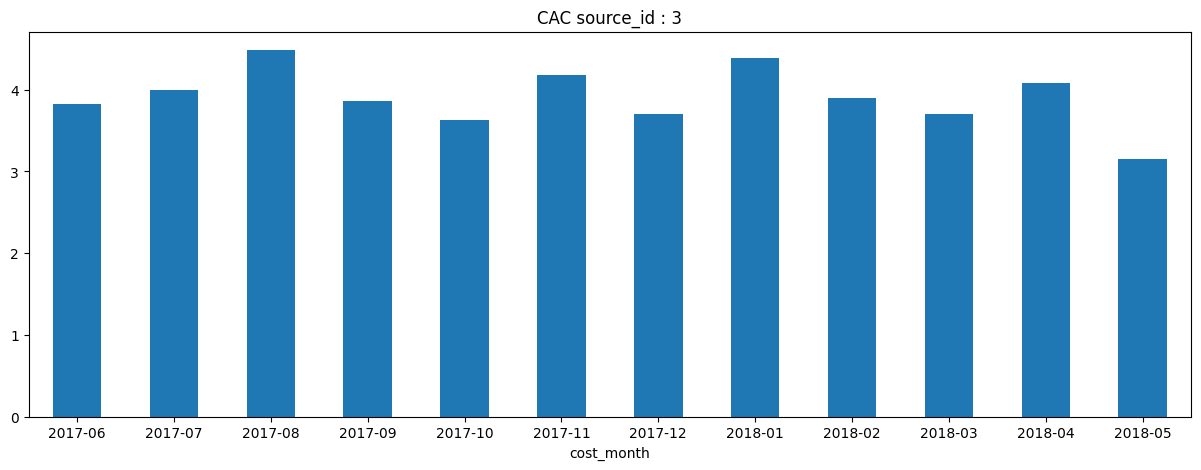

In [84]:
# Melihat CAC source_id 3
bar('cac_3')
plt.title('CAC source_id : 3')

CAC source_id : 3 tertinggi pada periode *2017-08* sebesar 4,487 per user.

cost_month
2017-06    1.738279
2017-07    1.836488
2017-08    2.350153
2017-09    2.013284
2017-10    1.479456
2017-11    1.321437
2017-12    1.753532
2018-01    1.729259
2018-02    1.564492
2018-03    1.687003
2018-04    1.938650
2018-05    1.411323
Name: cac_4, dtype: float64


Text(0.5, 1.0, 'CAC source_id : 4')

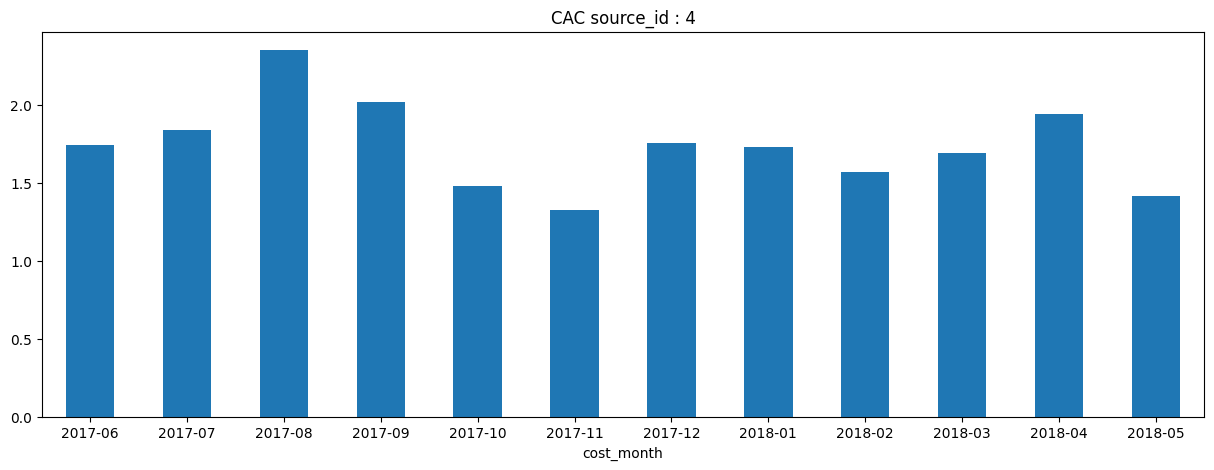

In [85]:
# Melihat CAC source_id 4
bar('cac_4')
plt.title('CAC source_id : 4')

CAC source_id : 4 tertinggi pada periode *2017-08* sebesar 2,350 per user.

cost_month
2017-06    1.293828
2017-07    1.559906
2017-08    1.596260
2017-09    1.492493
2017-10    1.328894
2017-11    1.551089
2017-12    1.340758
2018-01    1.592505
2018-02    1.389019
2018-03    1.281726
2018-04    1.539644
2018-05    1.228922
Name: cac_5, dtype: float64


Text(0.5, 1.0, 'CAC source_id : 5')

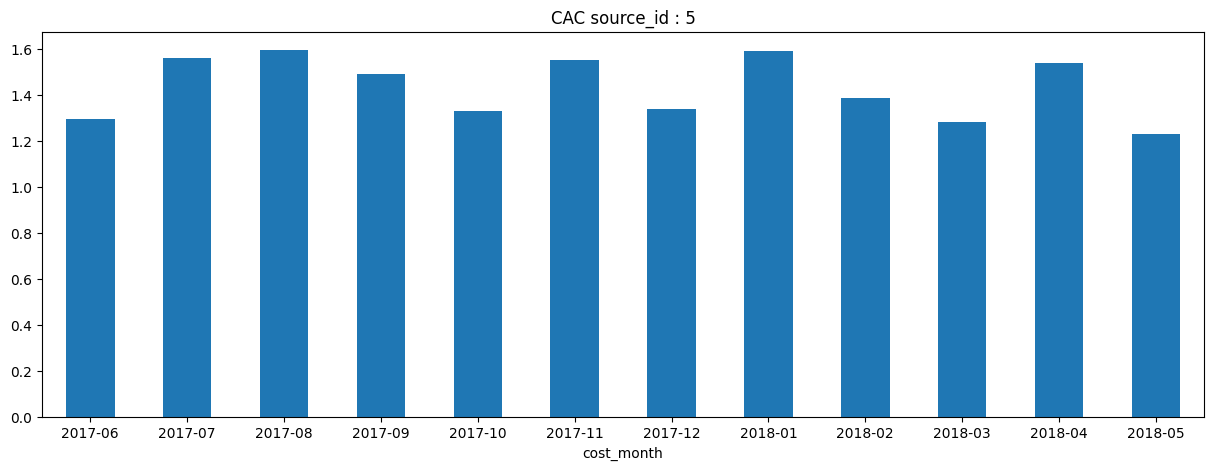

In [86]:
# Melihat CAC source_id 5
bar('cac_5')
plt.title('CAC source_id : 5')

CAC source_id : 5 tertinggi pada periode *2017-08* sebesar 1,596 per user.

cost_month
2017-06    0.141058
2017-07    0.157409
2017-08    0.181833
2017-09    0.161155
2017-10    0.140417
2017-11    0.167528
2017-12    0.150224
2018-01    0.162218
2018-02    0.151055
2018-03    0.135905
2018-04    0.164244
2018-05    0.121289
Name: cac_9, dtype: float64


Text(0.5, 1.0, 'CAC source_id : 9')

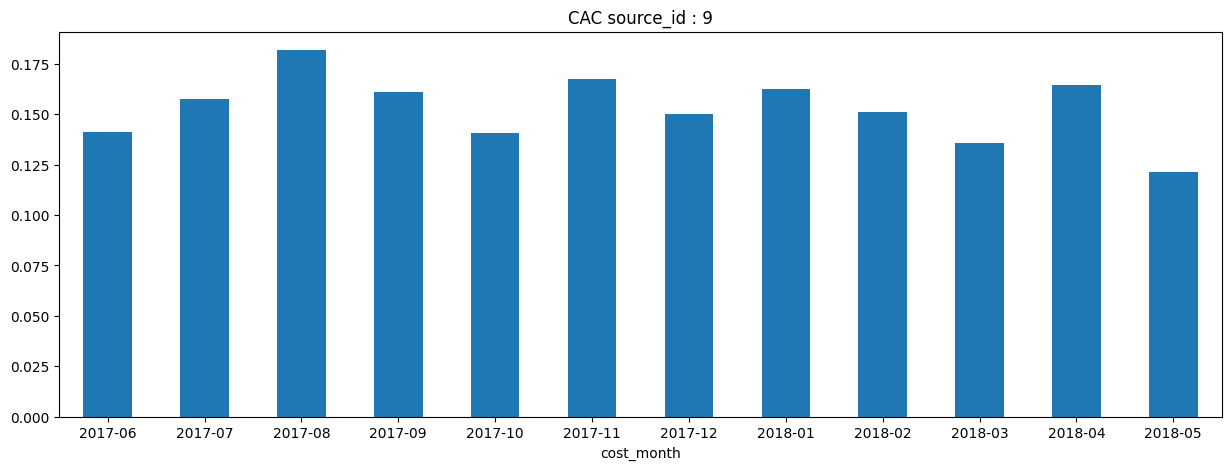

In [87]:
# Melihat CAC source_id 9
bar('cac_9')
plt.title('CAC source_id : 9')

CAC source_id : 9 tertinggi pada periode *2017-08* sebesar 0,182 per user.

cost_month
2017-06    0.155401
2017-07    0.171602
2017-08    0.169883
2017-09    0.178623
2017-10    0.144525
2017-11    0.194301
2017-12    0.147457
2018-01    0.182138
2018-02    0.131712
2018-03    0.148956
2018-04    0.170734
2018-05    0.137261
Name: cac_10, dtype: float64


Text(0.5, 1.0, 'CAC source_id : 10')

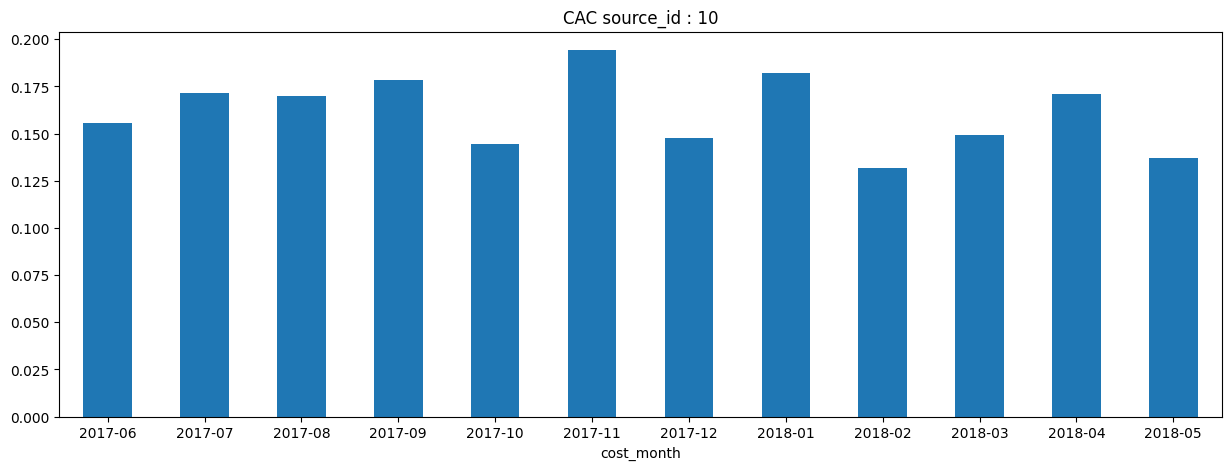

In [88]:
# Melihat CAC source_id 10
bar('cac_10')
plt.title('CAC source_id : 10')

CAC source_id : 10 tertinggi pada periode *2017-11* sebesar 0,194 per user.

cost_month
2017-06     8.909496
2017-07     9.490421
2017-08    10.803901
2017-09     9.448976
2017-10     8.369327
2017-11     9.295704
2017-12     8.747797
2018-01     9.937302
2018-02     8.962758
2018-03     8.606471
2018-04     9.801838
2018-05     7.442823
Name: cac_total, dtype: float64


Text(0.5, 1.0, 'CAC source_id : Total')

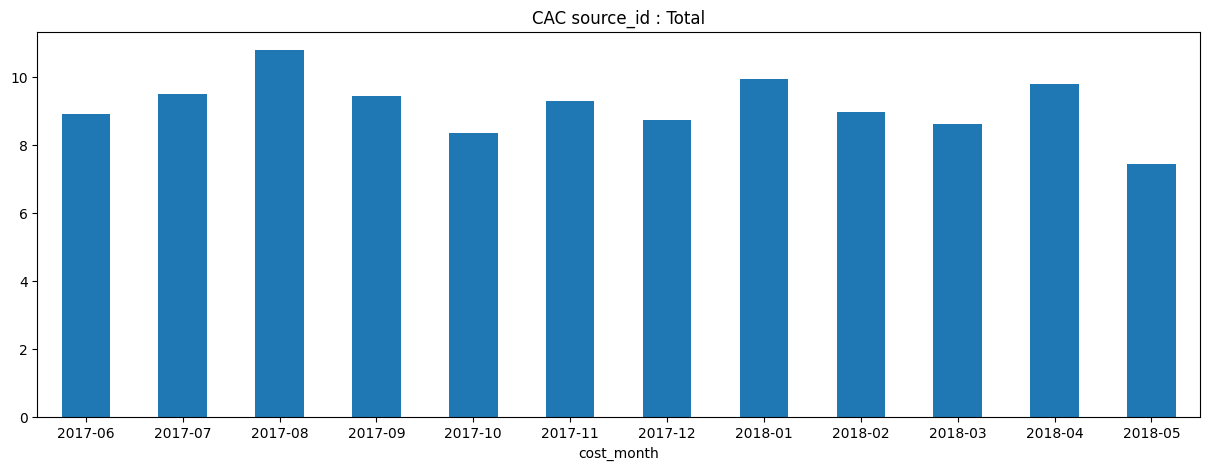

In [89]:
# Melihat CAC total
bar('cac_total')
plt.title('CAC source_id : Total')

CAC total tertinggi pada periode *2017-08* sebesar 10,8 per user.

             cac
source          
cac_3   3.908405
cac_4   1.735280
cac_5   1.432920
cac_2   1.183957
cac_1   0.576928
cac_10  0.161049
cac_9   0.152861


<Axes: title={'center': 'Total CAC composition'}, xlabel='source'>

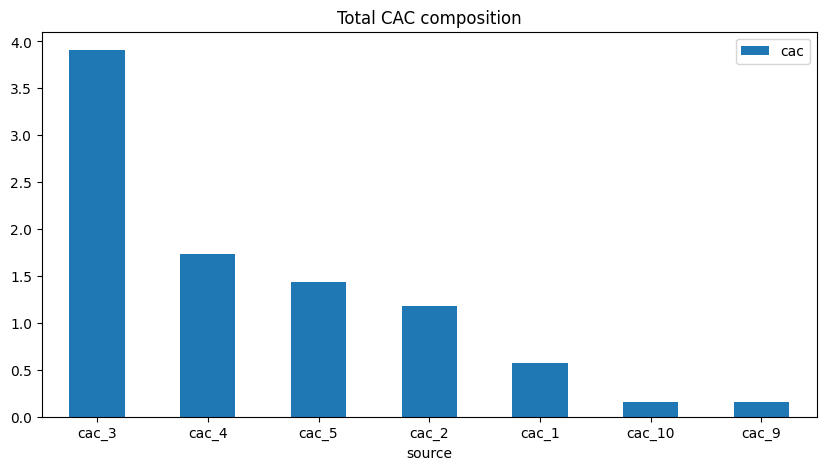

In [90]:
# Irisan data cac
total_cac = costs_per_source[['cac_1','cac_2','cac_3','cac_4','cac_5','cac_9','cac_10']].unstack().reset_index()
total_cac.columns = ['source', 'month', 'cac']

# pivot table cac total
total_cac_table = total_cac.pivot_table(index='source', values='cac', aggfunc='mean').sort_values('cac', ascending=False)

# Grafik batang cac keseluruhan
print(total_cac_table)
total_cac_table.plot(kind='bar', rot=0, figsize=(10,5), title='Total CAC composition')

Secara keseluruahan CAC tertinggi dari source id: 3 sebesar 3,9 per user, dan terendah source id: 9 sebesar 0,15 per user.

#### Kesimpulan

CAC source_id : 1 tertinggi pada periode *2017-08* sebesar 0,695 per user.

CAC source_id : 2 tertinggi pada periode *2017-08* sebesar 1,323 per user.

CAC source_id : 3 tertinggi pada periode *2017-08* sebesar 4,487 per user.

CAC source_id : 4 tertinggi pada periode *2017-08* sebesar 2,350 per user.

CAC source_id : 5 tertinggi pada periode *2017-08* sebesar 1,596 per user.

CAC source_id : 9 tertinggi pada periode *2017-08* sebesar 0,182 per user.

CAC source_id : 10 tertinggi pada periode *2017-11* sebesar 0,194 per user.

CAC total tertinggi pada periode *2017-08* disebabkan oleh jumlah pengguna yang paling sedikit.

Secara keseluruahan CAC tertinggi dari source id: 3 sebesar 3,9 per user, dan terendah source id: 9 sebesar 0,15 per user.

## ROI (Return on Investment)

In [91]:
# Menggabungkan total biaya ke data report
report = report.merge(costs_per_source['total'], left_on='first_order_month', right_on='cost_month', how='left')

In [92]:
# Menghitung CAC
report = report.rename(columns={'total':'total_cost'})
report['cac'] = report['total_cost'] / report['n_user']

# Menghitun ROI
report['roi'] = report['ltv'] / report['cac']

# Report ROI
roi_report = report.pivot_table(index='first_order_month', columns='age', values='roi', aggfunc='mean')
roi_report = roi_report.cumsum(axis=1).round(2)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, '2017-06'),
  Text(0, 1.5, '2017-07'),
  Text(0, 2.5, '2017-08'),
  Text(0, 3.5, '2017-09'),
  Text(0, 4.5, '2017-10'),
  Text(0, 5.5, '2017-11'),
  Text(0, 6.5, '2017-12'),
  Text(0, 7.5, '2018-01'),
  Text(0, 8.5, '2018-02'),
  Text(0, 9.5, '2018-03'),
  Text(0, 10.5, '2018-04'),
  Text(0, 11.5, '2018-05')])

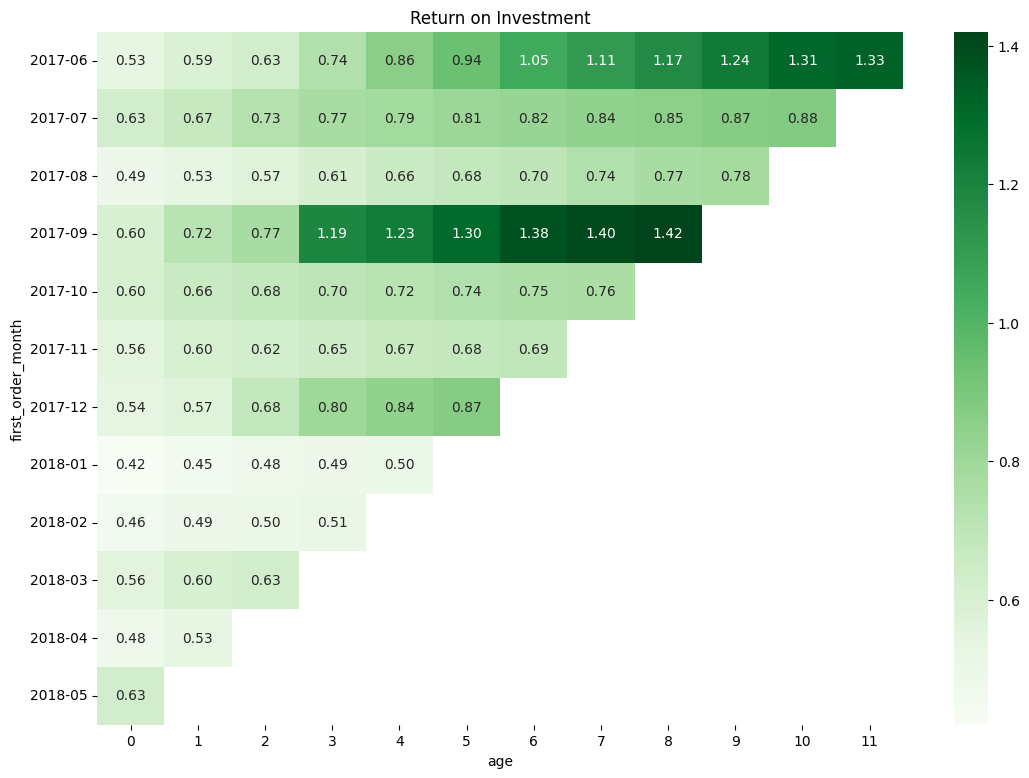

In [93]:
# Grafik heatmap ROI
plt.figure(figsize=(13,9))
plt.title('Return on Investment')
sns.heatmap(roi_report, cmap='Greens', fmt='.2f', annot=True)
plt.yticks(rotation=0)


Kohort *2017-06* mulai menghasilkan keuntungan pada bulan ke 6.

Kohort *2017-09* mulai menghasilkan keuntungan pada bulan ke 3.

#### Kesimpulan

Terdapat dua kohort yang menghasilkan keuntungan dalam periode data :

 1. Kohort *2017-09* menghasilkan keuntungan pada bulan ke 3 dan sudah menghasilkan pendapatan 1,42 x dari biaya akuisisi pengguna di akhir periode data.
 
 2. Kohort *2017-06* menghasilkan keuntungan pada bulan ke 6 dan sudah menghasilkan pendapatan 1.33 x dari biaya akuisisi pengguna di akhir periode data.

# Kesimpulan

Terdapat 3 data yang diberikan oleh Y.Afisha :

1. Data costs, berisi informasi mengenai besarnya biaya per sumber biaya.
2. Data orders, berisi informasi tanggal pembelian dan jumlah pembelian pengguna.
3. Data visits, berisi informasi kunjungan dan device pengguna.

Perbaikan yang dilakukan pada data orders :

1. Menghapus data pada kolom `Revenue` yang memiliki nilai 0.
2. Merubah nama kolom menjadi lowercase.
3. Merubah nama kolom Buy Ts menjadi buy_ts.

Perbaikan yang dilakukan pada data visits :

1. Merubah nama kolom menjadi lowercase.
2. Merubah nama kolom End Ts, Source Id, Start Ts menjadi end_ts, source_id, start_ts.


**Informasi yang didapatkan mengenai produk :**

In [94]:
avg_user_table

,dau,wau,mau
desktop,659,4129,16724
touch,252,1634,6825
all_device,907,5716,23228


Rata-rata jumlah pengguna aktif di kedua device ; harian : 907, mingguan : 5.716 dan bulanan : 23228. Dimana pengguna device desktop memiliki pengguna aktif tertinggi sebanyak ; harian : 659, mingguan : 4.129, dan bulanan : 16.724.

Jika jumlah pengguna desktop dan touch ditambahkan, totalnya tidak akan sama dengan jumlah pengguna all_device, hal ini disebabkan karena satu pengguna (uid) dapat menggunakan 2 device.


In [95]:
sticky_rate_table

,sticky_dau %,sticky_mau %
desktop,15.96,3.94
touch,15.47,3.70
all_device,15.88,3.91


Sebesar 15.88% pengguna menggunakan kembali produk per minggu dan 3.91% per bulan di kedua device. Tidak terdapat perbedaan yang tinggi dari sticky rate pada kedua device.

Rata-rata durasi penggunaan di kedua device adalah 60 detik, Tidak terdapat perbedaan rata-rata durasi yang tinggi di kedua device.

In [96]:
user_session

,n_session,n_user,sess_per_user
desktop,721.34,659.24,1.09
touch,266.76,252.87,1.05
all_device,987.36,907.99,1.09


Rata-rata sesi per user pada kedua device adalah 1,09.

Rata-rata sesi harian dan pengguna harian desktop lebih tinggi daripada touch.

**Informasi yang didapatkan mengenai penjualan:**

Dari total pengguna dalam data sebesar 72.17% atau 26.349 pengguna melakukan pembelian pada kunjungan pertamanya.

Pada bulan Oktober 2017 merupakan periode dimana jumlah pengguna tertinggi yang melakukan pembelian pada kunjungan pertamanya sebesar 3.299 pengguna dari total pengguna sebesar 4.340.

Sedangakan pada bulan Desember 2017 merupakan periode dimana jumlah pengguna tertinggi yang tidak melakukan pembelian pada kunjungan pertamanya sebesar 1.388 pengguna, namun memiliki total jumlah pengguna tertinggi yang melakukan pembelian sebesar 4.380.

Kohort *2017-09* menghasilkan pendapatan tertinggi sebesar 34.672 dan rata-rata pendapatan per pengguna tertinggi sebesar 13,44.

Jumlah pesanan tertinggi ada pada kohort *2017-10* sebesar 6.005 order.

Semua kohort melakukan pembelian yang besar pada awal bulan pembelian.

Kohort *2017-06* memiliki rata-rata pembelian kembali bulanan yang paling stabil.

Kohort *2017-09* memiliki rata-rata pembelian kembali tertinggi pada bulan ke 3 dengan rasio ltv sebesar 3,98.

**Informasi yang didapatkan mengenai pemasaran:**

Total biaya yang dikeluarkan sebesar 329.131 dimana porsi terbesar biaya dimiliki oleh sumber nomor 3 sebesar 141.321.

Periode *2017-12* merupakan periode yang memiliki biaya bulanan tertinggi sebesar 38.315.

CAC source_id : 1 tertinggi pada periode *2017-08* sebesar 0,695 per user.

CAC source_id : 2 tertinggi pada periode *2017-08* sebesar 1,323 per user.

CAC source_id : 3 tertinggi pada periode *2017-08* sebesar 4,487 per user.

CAC source_id : 4 tertinggi pada periode *2017-08* sebesar 2,350 per user.

CAC source_id : 5 tertinggi pada periode *2017-08* sebesar 1,596 per user.

CAC source_id : 9 tertinggi pada periode *2017-08* sebesar 0,182 per user.

CAC source_id : 10 tertinggi pada periode *2017-11* sebesar 0,194 per user.

CAC total tertinggi pada periode *2017-08* sebesar 10,8 per user yang disebabkan oleh jumlah pengguna yang paling sedikit sebanyak 1.369 user.

Secara keseluruahan CAC tertinggi dari source id: 3 sebesar 3,9 per user, dan terendah source id: 9 sebesar 0,15 per user.



**Return on Investment**

Terdapat dua kohort yang menghasilkan keuntungan dalam periode data :

    1. Kohort *2017-09-01* menghasilkan keuntungan pada bulan ke 3 dan sudah menghasilkan pendapatan 1,42 x dari biaya akuisisi pengguna di akhir periode data.
 
    2. Kohort *2017-06-01* menghasilkan keuntungan pada bulan ke 6 dan sudah menghasilkan pendapatan 1.33 x dari biaya akuisisi pengguna di akhir periode data.
